In [23]:
import numpy as np
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt

In [2]:
states0 = pd.DataFrame(pd.read_csv('states0.csv', index_col=0))
states1 = pd.DataFrame(pd.read_csv('states1.csv', index_col=0))
states2 = pd.DataFrame(pd.read_csv('states2.csv', index_col=0))
states3 = pd.DataFrame(pd.read_csv('states3.csv', index_col=0))
states4 = pd.DataFrame(pd.read_csv('states4.csv', index_col=0))
states5 = pd.DataFrame(pd.read_csv('states5.csv', index_col=0))
states6 = pd.DataFrame(pd.read_csv('states6.csv', index_col=0))
states7 = pd.DataFrame(pd.read_csv('states7.csv', index_col=0))
states8 = pd.DataFrame(pd.read_csv('states8.csv', index_col=0))
states9 = pd.DataFrame(pd.read_csv('states9.csv', index_col=0))

In [3]:
csvs = ['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv', 'states8.csv', 'states9.csv']

In [4]:
us_census = pd.concat([states0, states1, states2, states3, states4, states5, states6, states7, states8, states9])

In [5]:
us_census = us_census.drop_duplicates()

In [8]:
us_census.reset_index(drop=True, inplace=True)

In [6]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [7]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [10]:
us_census = us_census.join(us_census.GenderPop.str.split(pat='_', expand=True).rename({0: 'Male', 1: 'Female'}, axis='columns'))

In [13]:
us_census.drop('GenderPop', axis=1, inplace=True)

In [15]:
us_census_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Male', 'Female']

In [18]:
for c in us_census_columns:
    us_census[c] = us_census[c].str.extract('(\d*\.\d+|\d+)')
    us_census[c] = pd.to_numeric(us_census[c])

In [19]:
us_census.loc[:,'Female'][us_census['Female'].isnull()]

20   NaN
26   NaN
Name: Female, dtype: float64

In [20]:
us_census.Male[us_census['Female'].isnull()]

20    2872643
26     510163
Name: Male, dtype: int64

In [21]:
us_census.loc[:,'Female'][us_census['Female'].isnull()] = us_census.TotalPop[us_census['Female'].isnull()] - us_census.Male[us_census['Female'].isnull()]

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


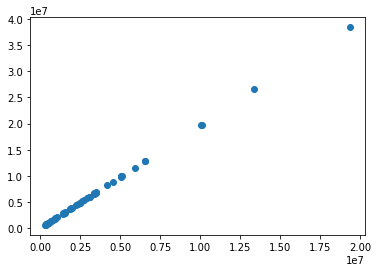

In [25]:
plt.scatter(us_census.Female, us_census.TotalPop) 
plt.show()

In [26]:
us_census.Pacific[us_census.Pacific.isnull()] = us_census.Pacific.mean()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
dtype: bool

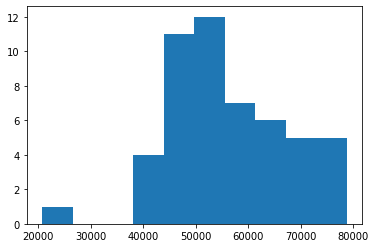

In [32]:
plt.hist(us_census.Income)
plt.show()

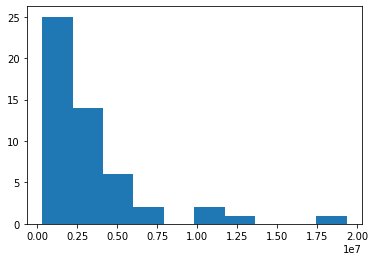

In [33]:
plt.hist(us_census.Female)
plt.show()

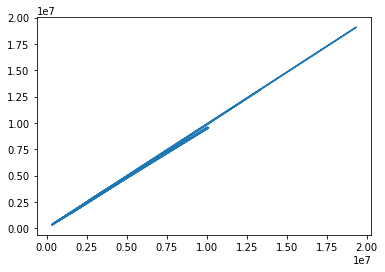

In [35]:
plt.plot(us_census.Female, us_census.Male)
plt.show()

# Part 2

In [41]:
inventory = pd.DataFrame(pd.read_csv('inventory.csv'))

In [42]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [43]:
staten_island = inventory.head(10)

In [44]:
product_request = staten_island['product_description']

In [45]:
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [46]:
seed_request = inventory.loc[(inventory['location'] == 'Brooklyn') & (inventory['product_type'] == 'seeds')]

In [47]:
inventory['in_stock'] = inventory['quantity'].apply(lambda x : True if x > 0 else False)

In [48]:
inventory['total_value'] = inventory['quantity'] * inventory['price']

In [49]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

In [50]:
full_description = inventory.apply(combine_lambda, axis=1)

In [51]:
full_description

0                            seeds - daisy
1                       seeds - calla lily
2                           seeds - tomato
3                      garden tools - rake
4               garden tools - wheelbarrow
5                     garden tools - spade
6             pest_control - insect killer
7               pest_control - weed killer
8     planter - 20 inch terracotta planter
9         planter - 8 inch plastic planter
10                           seeds - daisy
11                      seeds - calla lily
12                          seeds - tomato
13                     garden tools - rake
14              garden tools - wheelbarrow
15                    garden tools - spade
16            pest_control - insect killer
17              pest_control - weed killer
18    planter - 20 inch terracotta planter
19        planter - 8 inch plastic planter
20                           seeds - daisy
21                      seeds - calla lily
22                          seeds - tomato
23         